### stack() and unstack()
- stack() and unstack() are very helpful, especially when used in conjunction with group by.
- The stack function allows you to move the inner columns to the rows for the dataframe (i.e. The stack function helps you to reshape the dataframe.)
- the unstack function does the reverse.

In [1]:
import pandas as pd
oo = pd.read_csv('data/olympics.csv',skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Athletes taking part in the 2008 olympics in 100m or 200m Track events

In [2]:
men_women = oo[(oo.Edition==2008)&((oo.Event=='100m')|(oo.Event=='200m'))]
men_women.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27551,Beijing,2008,Athletics,Athletics,"DIX, Walter",USA,Men,100m,M,Bronze
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27553,Beijing,2008,Athletics,Athletics,"THOMPSON, Richard",TRI,Men,100m,M,Silver
27554,Beijing,2008,Athletics,Athletics,"FRASER, Shelly-ann",JAM,Women,100m,W,Gold
27555,Beijing,2008,Athletics,Athletics,"SIMPSON, Sherone",JAM,Women,100m,W,Silver


#### The next thing we want to do is to group by the country they represent, the gender, the discipline they are taking part in and the event.

In [3]:
group = men_women.groupby(['NOC','Gender','Discipline','Event']).size()
group

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

#### to get the same view as the original dataframe, we need to unstack this

In [4]:
frame = group.unstack(['Discipline','Event'])
frame

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

#### we can see that we have the dataframe we want

#### let's look at stacking
### stack()
- When using the stack function, the stack function returns a data frame or a series.
- And notice that you will never have any NaN values or missing data because by default the dropna flag is equal to true.
- The inner levels of a stack function are sorted. So when we do a stack, we are returning a data frame or series with a new innermost level of rows. i.e. stack() pivots a level of the column labels, returning a DataFrame or Series with a new innermost level of row labels. 

In [5]:
#original dataframe
frame

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [6]:
# let's use stack()
frame.stack()

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

#### - So the hundred meters and the two hundred meters which are the inner most columns are dragged down
#### - and if there's 100 or 200 meter that corresponds to each male or female athlete then this is listed.
#### - To help you remember the stack function, I try and visualize whether I want to make this data frame taller or wider.
#### - If I want to make the data frames taller, then I need to use the stack function because stacking gives you a taller data frame.

### Now in the real world, I prefer to actually specify which column I'm going to be using in the stacking function.

In [7]:
frame.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

### and I will get exactly the same dataframe as with frame.stack(). But frame.stack('Event') is a better approach.

### unstack()
- With unstack, we return a series or a DataFrame.
- Because the NAN values, of the missing data values are displayed, you have the option to fill them with another value.
- So, in the example of the Olympic data set that we are working on, it would make sense to have every NAN value to be zero, because that means that there were no medals won for that event.
- With unstacking, you can pivot a level of the index labels, and this returns a DataFrame having a new level of column labels.
- If the index isn't a MultiIndex, the output will be a series, and the level involved will automatically get sorted.

In [8]:
frame

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [9]:
frame.unstack()

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

#### when we do an unstack(), we get a wider dataframe
#### also, I prefer to explicitly state which column I am doing the unstacking on, in this case Gender

In [10]:
frame.unstack('Gender')

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

### Challenge
#### Plot the number of gold medals won by the US male and female athletes throughout the history of the Olympics?

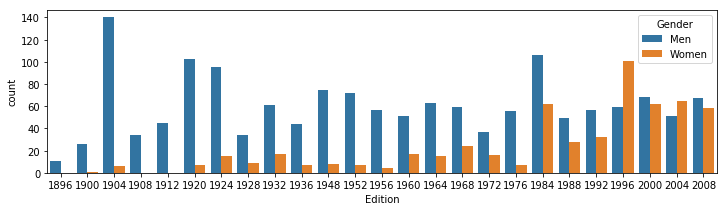

In [36]:
#using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,3]
sns.countplot(data=oo[(oo.NOC=='USA')&(oo.Medal=='Gold')], x='Edition', hue='Gender');

In [11]:
us_athletes = oo[(oo.NOC=='USA')&(oo.Medal=='Gold')]
us_athletes.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold


In [12]:
us_athletes.groupby(['Edition','Gender']).size().head()

Edition  Gender
1896     Men        11
1900     Men        26
         Women       1
1904     Men       140
         Women       6
dtype: int64

In [13]:
us_athletes.groupby(['Edition','Gender']).size().unstack('Gender',fill_value=0).head()

Gender,Men,Women
Edition,,
1896,11,0
1900,26,1
1904,140,6
1908,34,0
1912,45,0


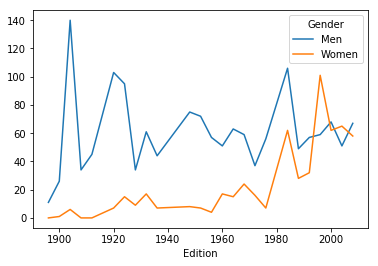

In [15]:
us_athletes.groupby(['Edition','Gender']).size().unstack('Gender',fill_value=0).plot()

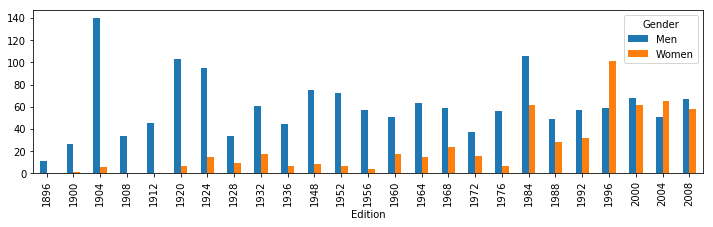

In [33]:
oo_usa_gm = oo[(oo.NOC=='USA')&(oo.Medal=='Gold')]
plt.rcParams["figure.figsize"] = [12,3]
oo_usa_gm.groupby(['Edition','Gender']).size().unstack(fill_value=0.0).plot(kind='bar');

#### Plot the 5 athletes who have won the most gold medals over the history of the Olympics. When there is a tie, consider the number of silver medals, then bronze medals.

In [16]:
oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0).head()

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1


#### now we need to sort by gold silver and bronze

In [17]:
athletes = oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)

In [18]:
athletes.sort_values(['Gold','Silver','Bronze'],ascending=False).head()

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2,14,0
"LATYNINA, Larisa",4,9,5
"NURMI, Paavo",0,9,3
"SPITZ, Mark",1,9,1
"LEWIS, Carl",0,9,1


#### I now have what I want, but I want columns in this order.. Gold, Silver and Bronze

In [19]:
athletes.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head()

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


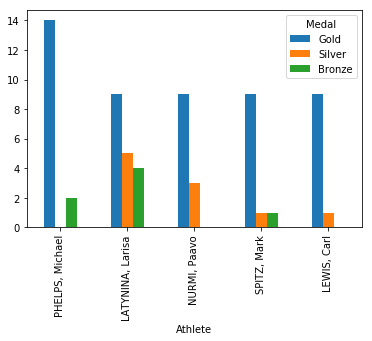

In [20]:
athletes.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar')